# Reto 01
***Dr. Antonio Arista Jalife***

En este reto vamos a comparar máquinas de soporte vectorial, árboles de decisión y redes neuronales artificiales. Veremos cual es mejor para solucionar un problema. Primero, importamos las librerías. En esta ocasión usaremos "make_classification" en lugar de "make_blobs" para añadirle algo de dificultad a todos los clasificadores.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

Observa que hace la función "make_classification":

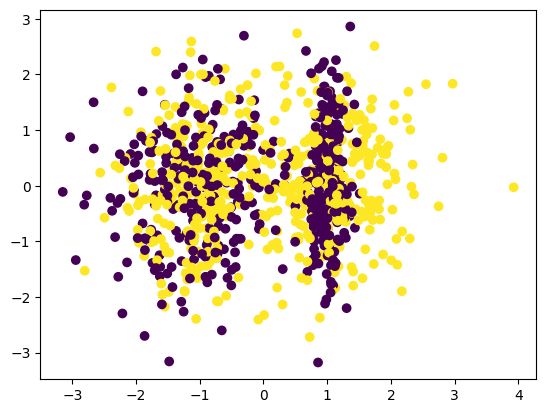

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Como puedes ver, en esta ocasión los puntos se encuentran sumamente revueltos. Ahora los clasificadores pueden tener dificultades para separarlos!

Lo siguiente será utilizar el código de la sesión 02 para evaluar.

In [3]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

## Redes Neuronales Artificiales: 

In [4]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)

In [5]:
evaluar(y_test, y_pred_nn)

[[182  19]
 [ 21 178]]
True positives: 178
True negatives: 182
False positives: 19
False negative: 21
Precision:90.0%
Sensibilidad:89.44723618090453%
Especificidad:90.54726368159204%


# Random Forests:

In [6]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)

In [7]:
evaluar(y_test, y_pred_rfc)

[[187  14]
 [  3 196]]
True positives: 196
True negatives: 187
False positives: 14
False negative: 3
Precision:95.75%
Sensibilidad:98.49246231155779%
Especificidad:93.03482587064677%
